### Building Chatbot with multiple tools using LangGraph

Create a chatbot with tool capabilitie from arxiv, wiki search and some functions

In [1]:
import os
from typing import Annotated
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph.message import add_messages
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_community.tools import ArxivQueryRun , WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper , ArxivAPIWrapper
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage , AIMessage, AnyMessage

from dotenv import load_dotenv
load_dotenv()

# Load API keys from environment variables
TAVILY_API_KEY = os.getenv('TAVILY_API_KEY')
GROQ_API_KEY = os.getenv('GROQ_API_KEY')

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv)

api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=2, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=500)


In [3]:
arxiv.invoke('Attention is all you need')

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [4]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [5]:
tavily = TavilySearchResults(api_key=TAVILY_API_KEY)
tavily.invoke('Provide me latest AI news')

/tmp/ipykernel_12447/3511424502.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults(api_key=TAVILY_API_KEY)


[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': "ScienceDaily\n\n# Artificial Intelligence News\n\n## Top Headlines\n\n## Latest Headlines\n\n## Earlier Headlines\n\n### Wednesday, May 28, 2025\n\n### Tuesday, May 27, 2025\n\n### Thursday, May 22, 2025\n\n### Wednesday, May 21, 2025\n\n### Monday, May 19, 2025\n\n### Thursday, May 15, 2025\n\n### Wednesday, May 14, 2025\n\n### Tuesday, May 13, 2025\n\n### Monday, May 12, 2025\n\n### Thursday, May 8, 2025\n\n### Wednesday, May 7, 2025\n\n### Tuesday, May 6, 2025\n\n### Monday, May 5, 2025\n\n### Thursday, May 1, 2025 [...] ### Wednesday, April 30, 2025\n\n### Monday, April 28, 2025\n\n### Friday, April 25, 2025\n\n### Thursday, April 24, 2025\n\n### Wednesday, April 23, 2025\n\n### Tuesday, April 22, 2025\n\n### Monday, April 21, 2025\n\n### Wednesday, April 16, 2025\n\n### Tuesday, April 15, 2025\n\n### Monday, April 14, 2025\n\

In [6]:
# Combine all the tools to create a toolkit
tools = [arxiv , wiki, tavily]

In [ ]:
# Initialize my LLM model
llm = ChatGroq(model='gemma2-9b-it')
llm_with_tools = llm.bind_tools(tools)
llm_with_tools.invoke([HumanMessage(content='What is recent AI news')])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3ns510nvz', 'function': {'arguments': '{"query":"recent ai news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1285, 'total_tokens': 1373, 'completion_time': 0.16, 'prompt_time': 0.03011903, 'queue_time': 0.25618978, 'total_time': 0.19011903}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2e8c4780-c2da-4b18-9f3a-4a775fdaae0c-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent ai news'}, 'id': '3ns510nvz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1285, 'output_tokens': 88, 'total_tokens': 1373})

In [9]:
llm.invoke('Give me top 5 ML libraries used')

AIMessage(content="Here are 5 of the most popular and widely-used machine learning (ML) libraries, along with a brief description of their strengths:\n\n1. **TensorFlow (Google)**:  \n    * **Strengths**:  Highly flexible and scalable, excellent for deep learning (neural networks), supports both research and production, vast community and resources.\n2. **PyTorch (Meta)**:\n    * **Strengths**:  Known for its intuitive and Pythonic API, favored by researchers for its dynamic computation graph, strong in natural language processing (NLP).\n3. **Scikit-learn**:\n    * **Strengths**:  User-friendly and well-documented, focuses on traditional machine learning algorithms (classification, regression, clustering, etc.), great for beginners and prototyping.\n4. **Keras**:\n    * **Strengths**:  Built on top of TensorFlow (or other backends), simplifies deep learning model building, beginner-friendly, allows for rapid prototyping.\n5. **XGBoost**:\n    * **Strengths**:  Extremely efficient and 

We will build the chatbot using LangGraph

In [ ]:
class State(TypedDict):
    messages : Annotated[list[AnyMessage] , add_messages]

# Create Nodes 
def tool_calling_llm(state : State):
    return {'messages' : [llm_with_tools.invoke(state['messages'])]}

builder = StateGraph(State)
builder.add_node('tool_calling_llm' , tool_calling_llm)
builder.add_node('tools' , ToolNode(tools))

# Adding the edges
builder.add_edge(START , 'tool_calling_llm')
builder.add_conditional_edges('tool_calling_llm' , tools_condition)
builder.add_edge('tools' , END)

# Compile
graph = builder.compile()

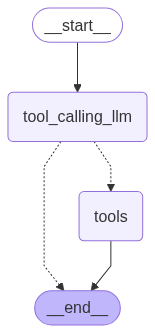

In [11]:
# Display
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
# Invocation
messages = graph.invoke({'messages' : HumanMessage(content='Give me 5 beautiful destinations in world')})
messages

{'messages': [HumanMessage(content='Give me 5 beautiful destinations in world', additional_kwargs={}, response_metadata={}, id='e6da441a-51b9-4dea-bf5c-c2e5ce9bb4e9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'zek9d6c22', 'function': {'arguments': '{"query":"List of beautiful places in the world"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1288, 'total_tokens': 1374, 'completion_time': 0.156363636, 'prompt_time': 0.029881019, 'queue_time': 0.247691987, 'total_time': 0.186244655}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--07ceddcf-8402-47f7-8050-46b2c45f4364-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'List of beautiful places in the world'}, 'id': 'zek9d6c22', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1288, 'output_tokens': 86, 'total_tokens': 1

In [13]:
for m in messages['messages']:
    m.pretty_print()

messages = graph.invoke({'messages' : HumanMessage(content='Give me details about research paper Attention is all you need')})

================================ Human Message =================================

Give me 5 beautiful destinations in world
================================== Ai Message ==================================
Tool Calls:
  wikipedia (zek9d6c22)
 Call ID: zek9d6c22
  Args:
    query: List of beautiful places in the world
================================= Tool Message =================================
Name: wikipedia

Page: Whenever, If Ever
Summary: Whenever, If Ever is the debut studio album by American indie rock band The World Is a Beautiful Place & I Am No Longer Afraid to Die, released on June 18, 2013, on Topshelf Records.


In [14]:
for m in messages['messages']:
    m.pretty_print()

messages = graph.invoke({'messages' : HumanMessage(content='What is Machine Learning')})

================================ Human Message =================================

Give me details about research paper Attention is all you need
================================== Ai Message ==================================
Tool Calls:
  arxiv (m1p00wcqr)
 Call ID: m1p00wcqr
  Args:
    query: Attention is all you need
================================= Tool Message =================================
Name: arxiv

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time o


In [15]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is Machine Learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (8r40v5d4z)
 Call ID: 8r40v5d4z
  Args:
    query: Machine Learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
